#### Ritvik Khurana

# Research question/interests

Briefly describe your research question or interests here.

In [51]:
import pandas as pd
import seaborn as sns
import traceback
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/raw/Stats.csv",encoding="ISO-8859-1", delimiter = ";").set_index('Rk')


In [4]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


## Milestone 3 Task 1 - EDA


There are a multitude of factors which contribute towards calculating a player's performance. Therefore in order
to identify the players in their prime and exclude outliers we need to take each of these factors in to account and
compile players who fit in most, if not all the factors' ranges. 

We also need to filter and create dataframes with players in different positions

### In order to find the prime ages for each playing position we will first need to identify columns that may come in handy 

1. Defenders
    - Short pass Accuracy (PasShoCmp%)
    - Long pass Accuracy (PasLonCmp%)
    - Tackles Won (TklWon)
2. Goalies
    - Long pass Accuracy (PasLonCmp%)
3. Attackers
    - Shots on target (SoT)
    - Shot Accuracy (G/SoT)
    - Assists (Assists)
    - Goal-creating actions (GCA)
4. Midfielders
    - Assists (Assists)
    - Goal-creating actions (GCA)
5. Factors affecting all positions
    - Pass Accuracy (PasShoCmp% + PasMedCmp% + PasLonCmp% / 3)
    - Red cards (CrdR)
    - Yellow cards (2CrdY)

In [81]:
df.head()

def_fac = ["PasShoCmp%", "PasLonCmp%", "TklWon"]
goal_fac = ["PasLonCmp%"]
atk_fac = ["SoT", "G/SoT", "Assists","GCA"]
mid_fac = ["Assists","GCA"]

df["pass_accuracy"] = (df["PasShoCmp%"] + df["PasMedCmp%"] + df["PasLonCmp%"])/3

all_fac = ["pass_accuracy","CrdR","2CrdY"]

In [22]:
all_columns = list(df.columns)

In [18]:
df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2859.000000,2858.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,...,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000
mean,1458.154949,26.195241,1994.607905,19.185380,14.047919,1261.481987,14.016579,0.113687,1.245498,0.399601,...,0.198909,1.085726,1.047905,0.015519,0.013333,0.003526,7.563298,1.696530,1.893708,41.101504
std,844.814975,4.600036,37.598592,11.443471,11.333306,971.315211,10.790886,0.235627,1.517184,0.791033,...,0.514413,1.346823,1.028824,0.213942,0.053399,0.020519,3.535982,1.945235,2.254804,23.766762
min,1.000000,16.000000,0.000000,1.000000,0.000000,5.000000,0.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,725.500000,23.000000,1992.000000,9.000000,3.000000,341.000000,3.800000,0.000000,0.320000,0.000000,...,0.000000,0.045000,0.480000,0.000000,0.000000,0.000000,5.255000,0.550000,0.880000,28.100000
50%,1458.000000,26.000000,1996.000000,20.000000,13.000000,1144.000000,12.700000,0.000000,0.840000,0.190000,...,0.030000,0.610000,0.930000,0.000000,0.000000,0.000000,7.440000,1.250000,1.410000,44.000000
75%,2187.500000,30.000000,1999.000000,29.000000,23.000000,2038.000000,22.600000,0.160000,1.855000,0.560000,...,0.200000,1.730000,1.420000,0.000000,0.000000,0.000000,9.450000,2.310000,2.225000,57.500000
max,2921.000000,41.000000,2006.000000,38.000000,38.000000,3420.000000,38.000000,5.000000,20.000000,20.000000,...,10.000000,15.000000,10.000000,10.000000,1.430000,0.500000,40.000000,30.000000,40.000000,100.000000


In [20]:
df.nunique()

Rk         2859
Player     2731
Nation      102
Pos          11
Squad        98
           ... 
OG           21
Recov       757
AerWon      483
AerLost     477
AerWon%     520
Length: 143, dtype: int64

In [87]:
# Getting all the different postions in the dataset
list(df["Pos"].unique())

exclusion_cols = {"PasTotCmp%"}

# Getting all players who have nan/0/false values in factor columns that affect all positions
# exclude = list(df[df["90s"]==0].index)

# Deleting all playes in exclude
try:
    for each in exclusion_cols:
        temp = list(df[df[each]==0].index)
        for every in temp:
            if (every not in df.index):
                continue
            df = df.drop(every)
except:
    print(traceback.format_exc())
    

# Filtering dataset for each position (Some players are repeated but they are judged on the poisition they were playing)
defenders = df[df["Pos"].str.contains("DF")].set_index('Rk')
attackers = df[df["Pos"].str.contains("FW")].set_index('Rk')
midfielders = df[df["Pos"].str.contains("MF")].set_index('Rk')
goalkeepers = df[df["Pos"].str.contains("GK")].set_index('Rk')

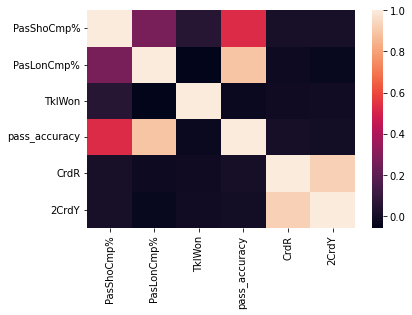

In [88]:
ht1 = sns.heatmap(defenders[def_fac + all_fac].corr());

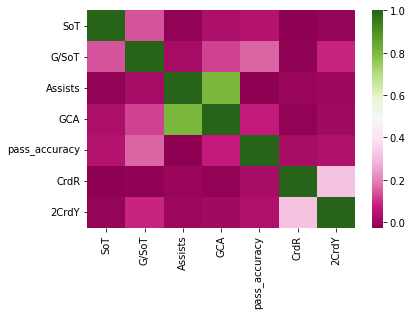

In [84]:
ht2 = sns.heatmap(attackers[atk_fac + all_fac].corr(), cmap="PiYG");

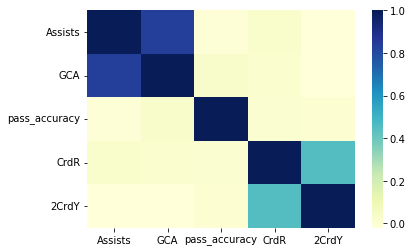

In [85]:
ht3 = sns.heatmap(midfielders[mid_fac + all_fac].corr(), cmap="YlGnBu");

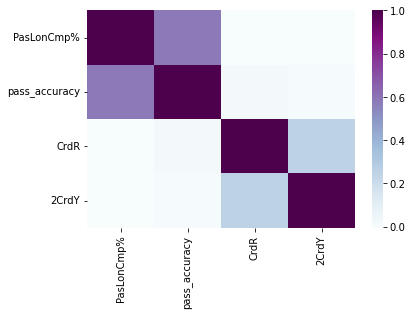

In [86]:
ht4 = sns.heatmap(goalkeepers[goal_fac + all_fac].corr(), cmap="BuPu");

In [9]:
# Checking to make sure our exlusions are taking place
len(defenders)

1123

## Milestone 3 Task 2 - Analysis Pipeline

1. Loading the data - In order to be able to load our data into out analysis we need to validate the data file 
    - Origin file is a ".csv" filetype with the delimiter of ";"
    - Origin file supports the "ISO-8859-1" encoding 
2. Preprocessing the data - To make our workflow more efficient we can drop unnessary columns that doesn't relate to our analysis 
*Note: Columns can be added or removed as we move forward with the analysis, so this section may change*

| Dropped Column | Description | Reason |
| -------------- | ----------- | ------ |
| Born | Year of birth | Our dataset already includes the ages of the places, therefore, making this column redundant|
|PPA| Completed passes into the 18-yard box | Irrelavent to Analysis        |
|CrsPA| Completed crosses into the 18-yard box | Irrelavent to Analysis        |
| CkIn | Inswinging corner kicks | Irrelavent to Analysis |
| CkOut | Outswinging corner kicks | Irrelavent to Analysis |
| CkStr | Straight corner kicks | Irrelavent to Analysis |
| OG | Own goals | Own goals can be biased, but it depends on the situvation, since we can't factor that into consideration, I believe I shouldn't include it |

3. Data cleansing - We also need to clean our data so its readable and doens't include any anomalies that may affect our code.
    - changing NAN values to the default datatype value (blank string if the column datatype is String, 0 if its int, etc.)
    - Identify false/incorrect data and adjust accordingly
    - Dropping columns with 10% or more missing data, to provide a fair analysis


4. Processing Data - In this step, we manipulate the data to find/create data thats suitable and supportive of our upcoming analysis
    - Creating supporting columns for out analysis
    | Column name | Description |
    | ----------- | ----------- |
    | Average Playtime | Minutes Played/Games Played , In this column we are using 2 pre-existing columns to create a column that contains the average playtime for each player |
    | *Example Name* | *Example Description* |
    - Replacing outlier values with the average of the column exluding the outliers
    
    
5. Wrangle Data
    - Create seperate datasets for each position to make analysis for each position easier
    - placeholder2
    
    
6. Exploratory Data Analysis
    - placeholder1
    - placeholder2
    
    
7. Data Analysis
    - placeholder1
    - placeholder2
    
    
8. Exporting
    - placeholder1
    - placeholder2

## Milestone 3 Task 4 - Analysis to answer the research question

### Comparisons for each position

 - DF:Defender {identifying factors : average time played(90s) vs Tackles in 1/3 defense zone ("TklDef3rd")}

 - MF:Midfielder {identifying factors : Pass completion percentage (PasTotCmp%) vs received passes ("Rec" & "Rec%")}

 - FW:Forward {identifying factors : dribbles that lead to a shot attempt("ScaDrib") vs Shots on target percentage(SoT%)}

 - GK:Goalkeeper {identifying factors : passes to defenders into open space(TB) vs inverse of Own goals(1-OG)}

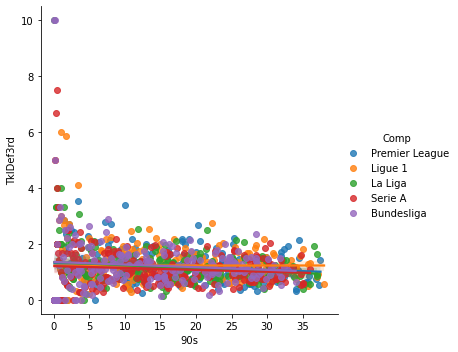

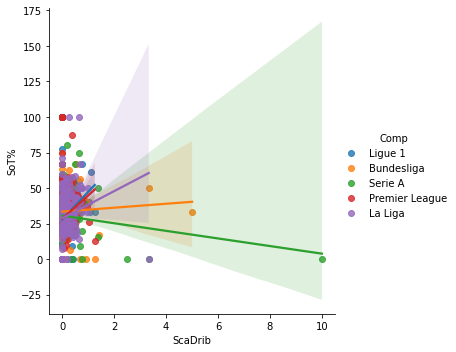

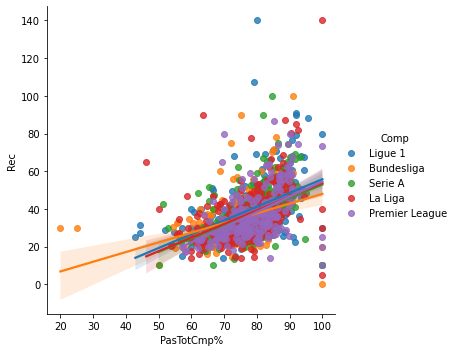

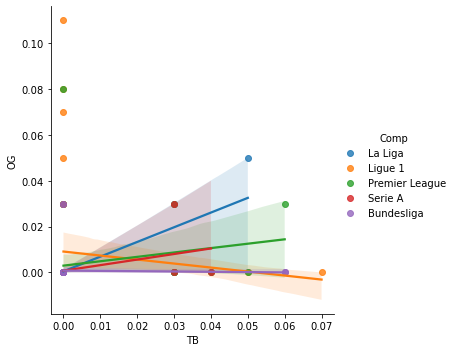

In [59]:
sns.lmplot(x="90s", y="TklDef3rd", data=defenders, hue="Comp");
sns.lmplot(x="ScaDrib", y="SoT%", data=attackers, hue="Comp");
sns.lmplot(x="PasTotCmp%", y="Rec", data=midfielders, hue="Comp");
sns.lmplot(x="TB", y="OG", data=goalkeepers, hue="Comp");


<AxesSubplot:xlabel='TklWon', ylabel='Fls'>

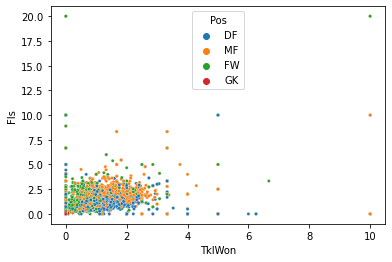

In [181]:
main_pos = df.copy().set_index("Rk")
temp_df = pd.DataFrame(columns=all_columns)

        
temp_holder= list(main_pos["Pos"])
        
for each in range(0,len(main_pos["Pos"])):
    if len(temp_holder[each])>2:
        temp_holder[each] = [temp_holder[each][0:2],temp_holder[each][2:4]]
    else:
        temp_holder[each] = [temp_holder[each]]
        
main_pos["Pos"] = temp_holder
main_pos = main_pos.explode("Pos")

            
sns.scatterplot(x = main_pos["TklWon"],y = main_pos["Fls"],hue = main_pos["Pos"], s =10)

In [201]:
main_pos.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,pass_accuracy
Rk,,,,,,,,,,,,,,,,,,,,,
1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,2881,...,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7,70.733333
2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,2983,...,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8,80.333333
3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,2462,...,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0,91.466667
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,2956,...,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0,81.033333
5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,45,...,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0,27.766667


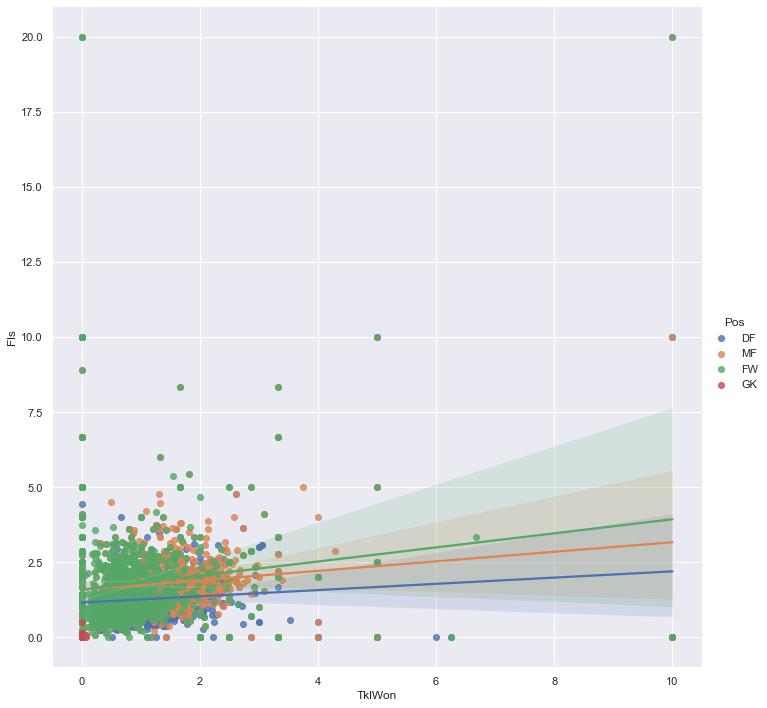

In [197]:
x = sns.lmplot(x="TklWon", y="Fls", data=main_pos, hue="Pos",height=10);

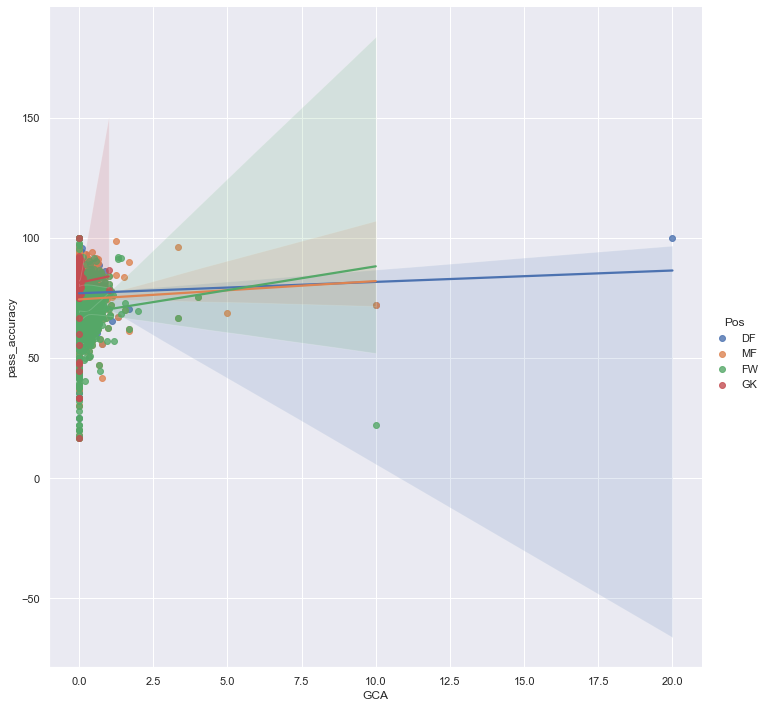

In [198]:
y = sns.lmplot(x="GCA", y="pass_accuracy", data=main_pos, hue="Pos",height=10);